In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forbes-worlds-billionaires-list-2024/2024 Billionaire List.csv


# Import file

In [2]:
billionaires = pd.read_csv('/kaggle/input/forbes-worlds-billionaires-list-2024/2024 Billionaire List.csv')

billionaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                2781 non-null   object 
 1   Age                 2700 non-null   float64
 2   2024 Net Worth      2781 non-null   object 
 3   Industry            2781 non-null   object 
 4   Source of Wealth    2781 non-null   object 
 5   Title               2698 non-null   object 
 6   Organization        2486 non-null   object 
 7   Self-Made           2781 non-null   bool   
 8   Self-Made Score     589 non-null    float64
 9   Philanthropy Score  432 non-null    float64
 10  Residence           2746 non-null   object 
 11  Citizenship         2781 non-null   object 
 12  Gender              2781 non-null   object 
 13  Marital Status      2203 non-null   object 
 14  Children            1705 non-null   float64
 15  Education           1998 non-null   object 
dtypes: boo

# Data Lookup

In [3]:
billionaires.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Age,2024 Net Worth,Industry,Source of Wealth,Title,Organization,Self-Made,Self-Made Score,Philanthropy Score,Residence,Citizenship,Gender,Marital Status,Children,Education
0,Bernard Arnault & family,75.0,$233B,Fashion & Retail,LVMH,Chairman and CEO,LVMH Moët Hennessy Louis Vuitton,False,NaN,NaN,"Paris, France",France,M,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ..."
1,Elon Musk,52.0,$195B,Automotive,"Tesla, SpaceX",CEO,Tesla,True,8.0,1.0,"Austin, Texas",United States,M,Single,11.0,"Bachelor of Arts/Science, University of Pennsy..."
2,Jeff Bezos,60.0,$194B,Technology,Amazon,Chairman and Founder,Amazon,True,8.0,2.0,"Miami, Florida",United States,M,Engaged,4.0,"Bachelor of Arts/Science, Princeton University"
3,Mark Zuckerberg,39.0,$177B,Technology,Facebook,Co-founder,Meta Platforms,True,8.0,2.0,"Palo Alto, California",United States,M,Married,3.0,"Drop Out, Harvard University"
4,Larry Ellison,79.0,$141B,Technology,Oracle,CTO and Founder,Oracle,True,9.0,1.0,"Woodside, California",United States,M,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni..."


In [4]:
billionaires.shape       
billionaires.describe()  

,Age,Self-Made Score,Philanthropy Score,Children
count,2700.000000,589.000000,432.000000,1705.000000
mean,65.734444,6.612903,1.974537,2.960704
std,13.464052,2.622425,1.004306,1.651285
min,19.000000,1.000000,1.000000,1.000000
25%,57.000000,5.000000,1.000000,2.000000
50%,66.000000,8.000000,2.000000,3.000000
75%,75.000000,8.000000,2.000000,4.000000
max,102.000000,10.000000,5.000000,23.000000


# Missing Values

In [5]:
billionaires.isna().sum()


Name                     0
Age                     81
2024 Net Worth           0
Industry                 0
Source of Wealth         0
Title                   83
Organization           295
Self-Made                0
Self-Made Score       2192
Philanthropy Score    2349
Residence               35
Citizenship              0
Gender                   0
Marital Status         578
Children              1076
Education              783
dtype: int64

# Data Cleaning

In [6]:
billionaires['2024 Net Worth'] = billionaires['2024 Net Worth'].replace('[\$,B]', '', regex=True).astype(float)
billionaires.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Age,2024 Net Worth,Industry,Source of Wealth,Title,Organization,Self-Made,Self-Made Score,Philanthropy Score,Residence,Citizenship,Gender,Marital Status,Children,Education
0,Bernard Arnault & family,75.0,233.0,Fashion & Retail,LVMH,Chairman and CEO,LVMH Moët Hennessy Louis Vuitton,False,NaN,NaN,"Paris, France",France,M,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ..."
1,Elon Musk,52.0,195.0,Automotive,"Tesla, SpaceX",CEO,Tesla,True,8.0,1.0,"Austin, Texas",United States,M,Single,11.0,"Bachelor of Arts/Science, University of Pennsy..."
2,Jeff Bezos,60.0,194.0,Technology,Amazon,Chairman and Founder,Amazon,True,8.0,2.0,"Miami, Florida",United States,M,Engaged,4.0,"Bachelor of Arts/Science, Princeton University"
3,Mark Zuckerberg,39.0,177.0,Technology,Facebook,Co-founder,Meta Platforms,True,8.0,2.0,"Palo Alto, California",United States,M,Married,3.0,"Drop Out, Harvard University"
4,Larry Ellison,79.0,141.0,Technology,Oracle,CTO and Founder,Oracle,True,9.0,1.0,"Woodside, California",United States,M,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni..."


# Data Analysis

In [7]:
# tOP 10 richest
billionaires.sort_values('2024 Net Worth', ascending=False).head(10)[['Name','2024 Net Worth','Industry']]


,Name,2024 Net Worth,Industry
0,Bernard Arnault & family,233.0,Fashion & Retail
1,Elon Musk,195.0,Automotive
2,Jeff Bezos,194.0,Technology
3,Mark Zuckerberg,177.0,Technology
4,Larry Ellison,141.0,Technology
5,Warren Buffett,133.0,Finance & Investments
6,Bill Gates,128.0,Technology
7,Steve Ballmer,121.0,Technology
8,Mukesh Ambani,116.0,Diversified
9,Larry Page,114.0,Technology


In [8]:
# Average net worth by industry
billionaires.groupby('Industry')['2024 Net Worth'].mean().sort_values(ascending=False).head(10)


Industry
Technology               7.607310
Automotive               7.120779
Fashion & Retail         6.870877
Telecom                  6.840000
Metals & Mining          6.340000
Gambling & Casinos       5.785000
Diversified              5.656716
Logistics                5.264706
Energy                   5.147959
Finance & Investments    5.094379
Name: 2024 Net Worth, dtype: float64

In [9]:
# Gender comparison
billionaires.groupby('Gender')['2024 Net Worth'].mean()
billionaires['Gender'].value_counts()


Gender
M    2412
F     369
Name: count, dtype: int64

In [10]:
#Residence analysis
billionaires['Residence'].value_counts().head(10)


Residence
New York, New York           109
Moscow, Russia                73
Hong Kong, Hong Kong          71
Mumbai, India                 69
Beijing, China                63
London, United Kingdom        61
Shanghai, China               54
Singapore, Singapore          52
San Francisco, California     50
Delhi, India                  43
Name: count, dtype: int64

# Data Visualize

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


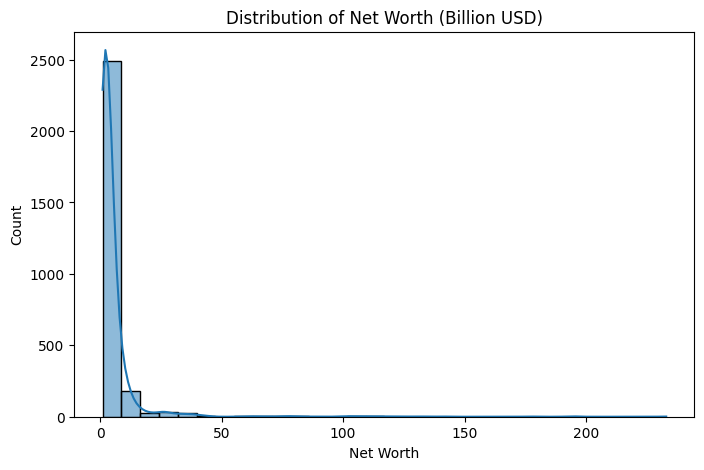

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Net Worth
plt.figure(figsize=(8,5))
sns.histplot(billionaires['2024 Net Worth'], bins=30, kde=True)
plt.title('Distribution of Net Worth (Billion USD)')
plt.xlabel('Net Worth')
plt.show()

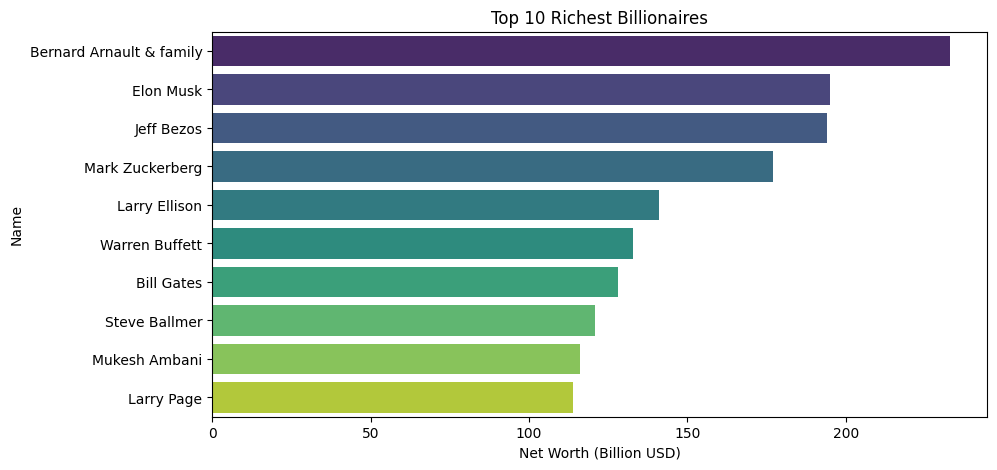

In [12]:
# Top 10 richest
top10 = billionaires.sort_values('2024 Net Worth', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='2024 Net Worth', y='Name', data=top10, palette='viridis')
plt.title('Top 10 Richest Billionaires')
plt.xlabel('Net Worth (Billion USD)')
plt.show()

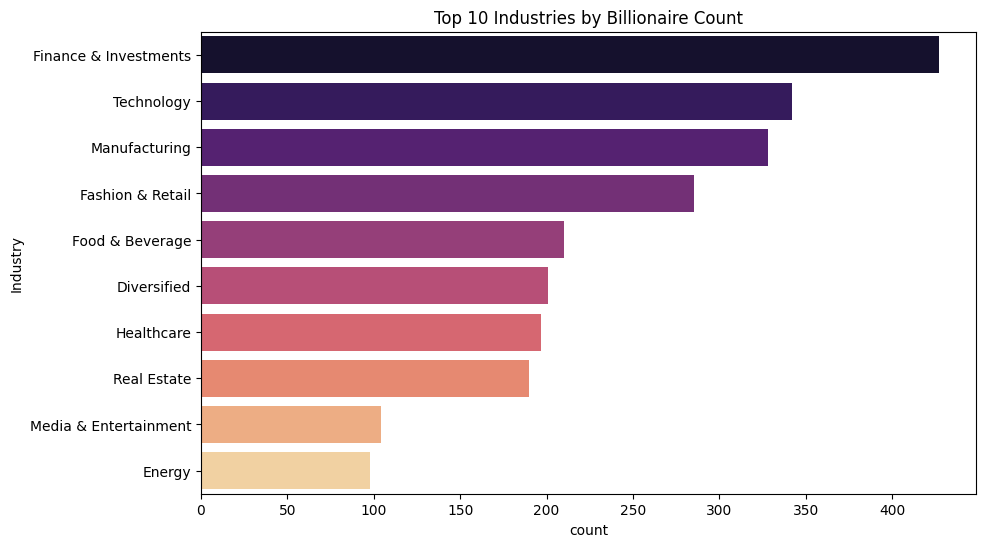

In [13]:
# Count of billionaires by Industry
plt.figure(figsize=(10,6))
sns.countplot(y='Industry', data=billionaires, order=billionaires['Industry'].value_counts().head(10).index, palette='magma')
plt.title('Top 10 Industries by Billionaire Count')
plt.show()

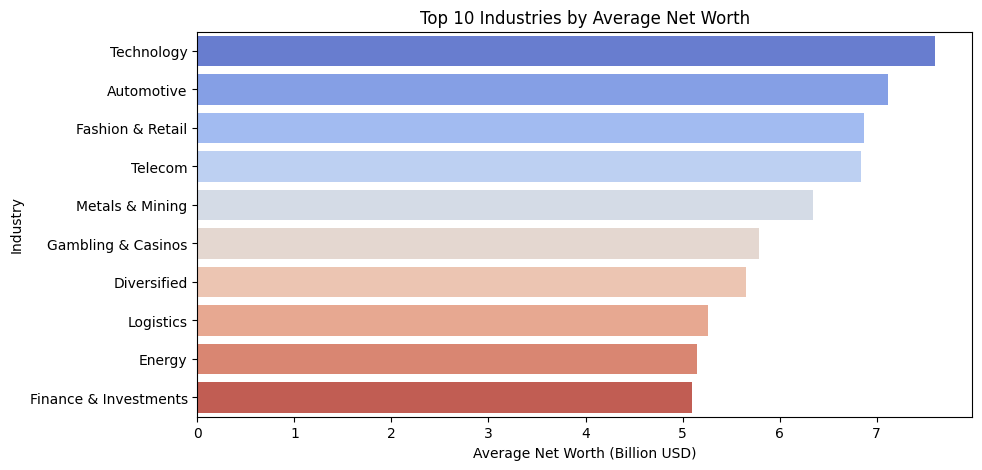

In [14]:
# Average Net Worth by Industry
industry_networth = billionaires.groupby('Industry')['2024 Net Worth'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=industry_networth.values, y=industry_networth.index, palette='coolwarm')
plt.title('Top 10 Industries by Average Net Worth')
plt.xlabel('Average Net Worth (Billion USD)')
plt.show()


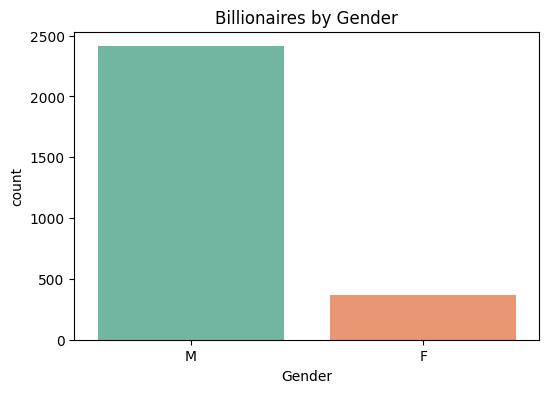

In [15]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=billionaires, palette='Set2')
plt.title('Billionaires by Gender')
plt.show()

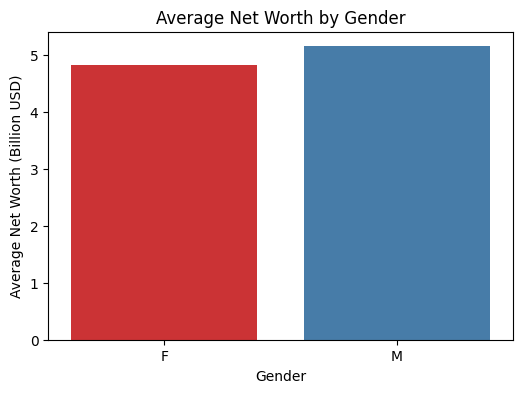

In [16]:
# Gender vs Average Net Worth
gender_networth = billionaires.groupby('Gender')['2024 Net Worth'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=gender_networth.index, y=gender_networth.values, palette='Set1')
plt.title('Average Net Worth by Gender')
plt.ylabel('Average Net Worth (Billion USD)')
plt.show()

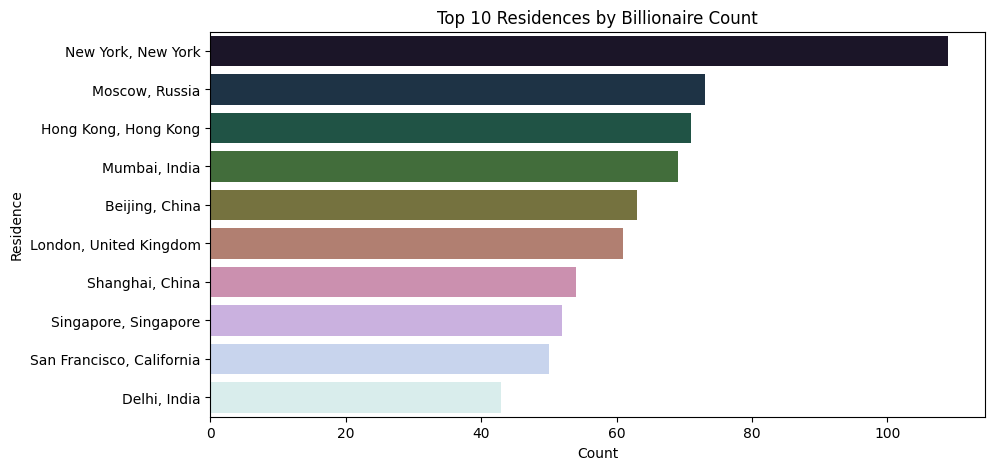

In [17]:
# Top 10 Residences
top_residences = billionaires['Residence'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_residences.values, y=top_residences.index, palette='cubehelix')
plt.title('Top 10 Residences by Billionaire Count')
plt.xlabel('Count')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


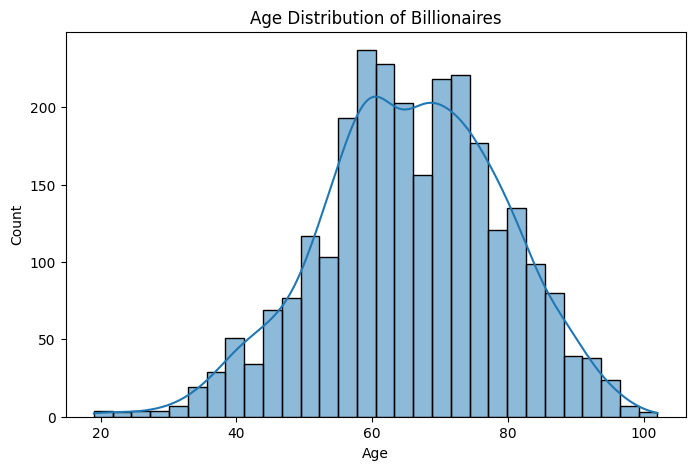

In [18]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(billionaires['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.show()

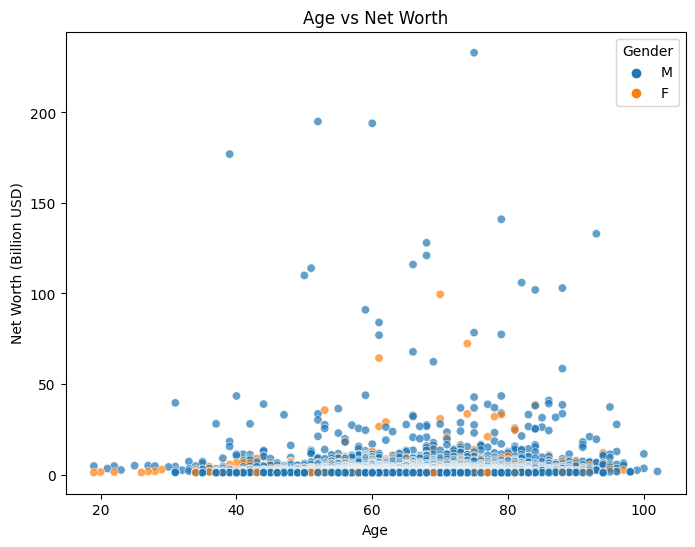

In [19]:
# Age vs Net Worth scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='2024 Net Worth', data=billionaires, hue='Gender', alpha=0.7)
plt.title('Age vs Net Worth')
plt.xlabel('Age')
plt.ylabel('Net Worth (Billion USD)')
plt.show()

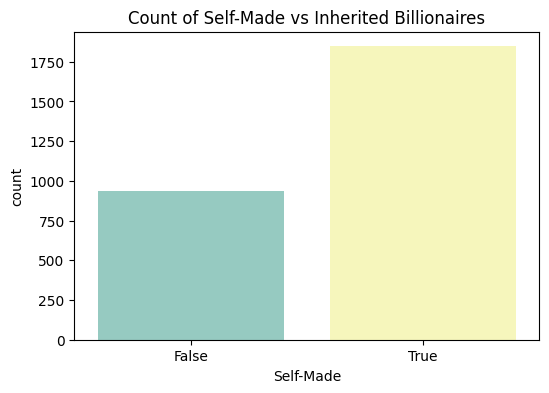

In [20]:
# Self-Made vs Inherited Wealth Count
plt.figure(figsize=(6,4))
sns.countplot(x='Self-Made', data=billionaires, palette='Set3')
plt.title('Count of Self-Made vs Inherited Billionaires')
plt.show()

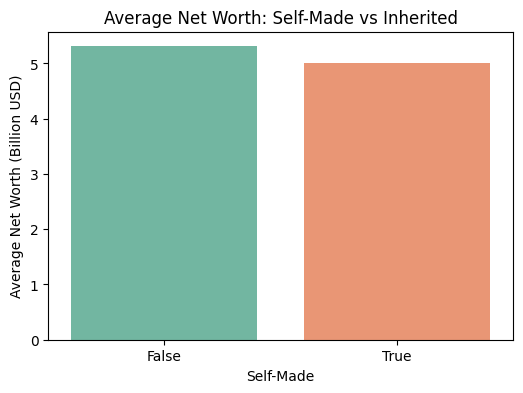

In [21]:
# Self-Made vs Average Net Worth
selfmade_networth = billionaires.groupby('Self-Made')['2024 Net Worth'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=selfmade_networth.index, y=selfmade_networth.values, palette='Set2')
plt.title('Average Net Worth: Self-Made vs Inherited')
plt.ylabel('Average Net Worth (Billion USD)')
plt.show()

/tmp/ipykernel_13/4144425328.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Children', y='2024 Net Worth', data=billionaires, jitter=True, palette='coolwarm', alpha=0.7)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this 

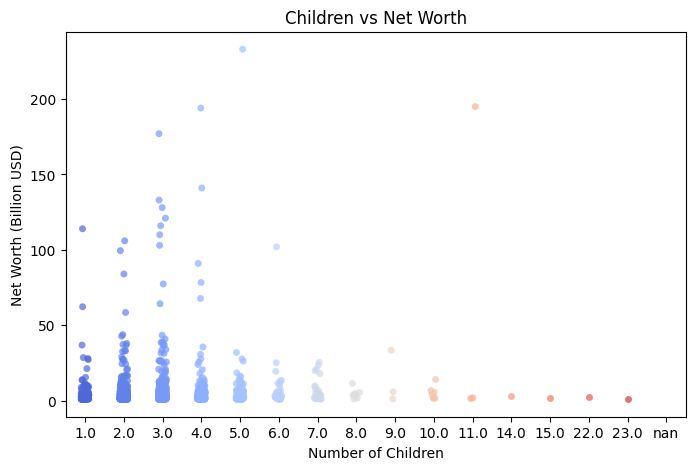

In [22]:
# Children vs Net Worth scatter with jitter
plt.figure(figsize=(8,5))
sns.stripplot(x='Children', y='2024 Net Worth', data=billionaires, jitter=True, palette='coolwarm', alpha=0.7)
plt.title('Children vs Net Worth')
plt.xlabel('Number of Children')
plt.ylabel('Net Worth (Billion USD)')
plt.show()

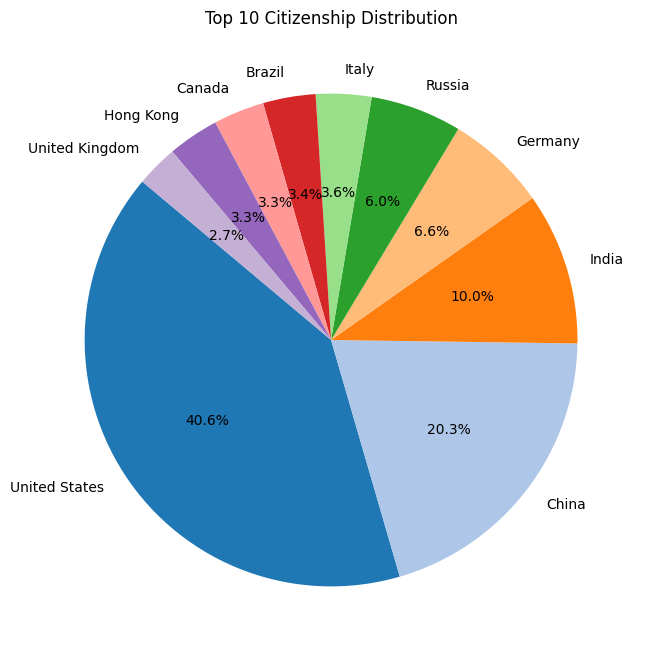

In [23]:
# Citizenship distribution pie chart
citizenship_counts = billionaires['Citizenship'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(citizenship_counts, labels=citizenship_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab20'))
plt.title('Top 10 Citizenship Distribution')
plt.show()

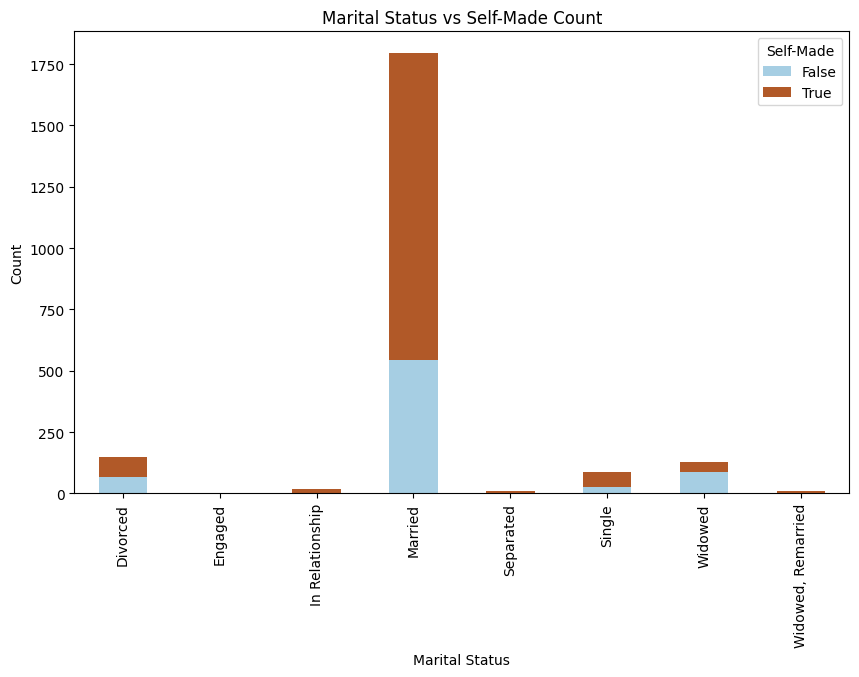

In [24]:
# Marital Status stacked bar plot with Self-Made
marital_selfmade = billionaires.groupby(['Marital Status','Self-Made']).size().unstack(fill_value=0)
marital_selfmade.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Paired')
plt.title('Marital Status vs Self-Made Count')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Predict Networth

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Create a simple numeric feature to demo ML
billionaires['Age_filled'] = billionaires['Age'].fillna(billionaires['Age'].median())

# Features & target
X = billionaires[['Age_filled']]  # only numeric, clean
y = billionaires['2024 Net Worth']

# Drop any missing target
y = y.fillna(y.median())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict & evaluate
y_pred = rf.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# Quick Prediction Example
sample = pd.DataFrame({'Age_filled':[50]})
predicted_networth = rf.predict(sample)[0]
print(f"Predicted Net Worth for 50yo: ${predicted_networth:.2f}B")


RMSE: 5.971665685169968
R2 Score: -0.20612826737070478
Predicted Net Worth for 50yo: $6.10B
